# Generative Adversarial Networks basic

This code helps us learn about GAN. The model is trained and tested using just simple pattern [1, 0, 1, 0] . 
<br><br>
generate_real() : can make synthetic real data pattern [1,0,1,0]. 0.8 ~ 1.0 and 0.0 ~ 0.2 mean random noise.


In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy

In [ ]:
def generate_real():
    real_data = torch.FloatTensor([random.uniform(0.8, 1.0),
                                   random.uniform(0.0, 0.2),
                                   random.uniform(0.8, 1.0),
                                   random.uniform(0.0, 0.2)])
    return real_data

generate_real()

tensor([0.8998, 0.0205, 0.8571, 0.0926])

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(4,3),
            nn.Sigmoid(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )

        self.loss_function = nn.MSELoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)

        self.counter += 1

        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            pass
        
        if self.counter % 1000 == 0:
            print("counter = ", self.counter)
            pass
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
        pass

In [ ]:
def generate_random(size): # to test discriminator
    random_data = torch.rand(size)
    return random_data

In [ ]:
D = Discriminator()

for i in range(10000):
    D.train(generate_real(), torch.FloatTensor([1.0]))
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000


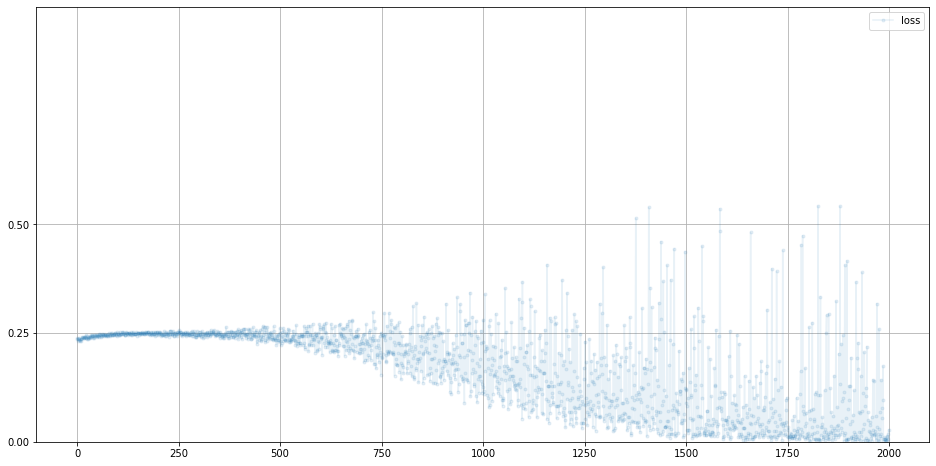

In [ ]:
D.plot_progress()

In [ ]:
print(D.forward(generate_real()).item())
print(D.forward(generate_random(4)).item())

0.8406376838684082
0.17970094084739685


In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(1,3),
            nn.Sigmoid(),
            nn.Linear(3,4),
            nn.Sigmoid()
        )

        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.counter = 0
        self.progress = []
        
        pass
    
    def forward(self, inputs):
        return self.model(inputs)
    
    def train(self, D, inputs, targets):
        g_output = self.forward(inputs)
        d_output = D.forward(g_output)

        loss = D.loss_function(d_output, targets)

        self.counter += 1

        if self.counter % 10 == 0:
            self.progress.append(loss.item())
            pass
        
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        pass
    
    def plot_progress(self):
        df = pd.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0,0.25,0.5))
        pass

In [ ]:
G = Generator()
G.forward(torch.FloatTensor([0.5]))

tensor([0.3617, 0.4551, 0.7106, 0.3941], grad_fn=<SigmoidBackward>)

In [ ]:
# train GAN
%%time

D = Discriminator()
G = Generator()

image_list = []

for i in range(10000):
    # step 1 : train discriminator about real data
    D.train(generate_real(), torch.FloatTensor([1.0]))

    # step 2 : train discriminator about fake data
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))

    # step 3 : train generator
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))

    if i % 1000 == 0:
        image_list.append(G.forward(torch.FloatTensor([0.5])).detach().numpy())

    pass

counter =  1000
counter =  2000
counter =  3000
counter =  4000
counter =  5000
counter =  6000
counter =  7000
counter =  8000
counter =  9000
counter =  10000
counter =  11000
counter =  12000
counter =  13000
counter =  14000
counter =  15000
counter =  16000
counter =  17000
counter =  18000
counter =  19000
counter =  20000
CPU times: user 10.6 s, sys: 24.8 ms, total: 10.7 s
Wall time: 10.6 s


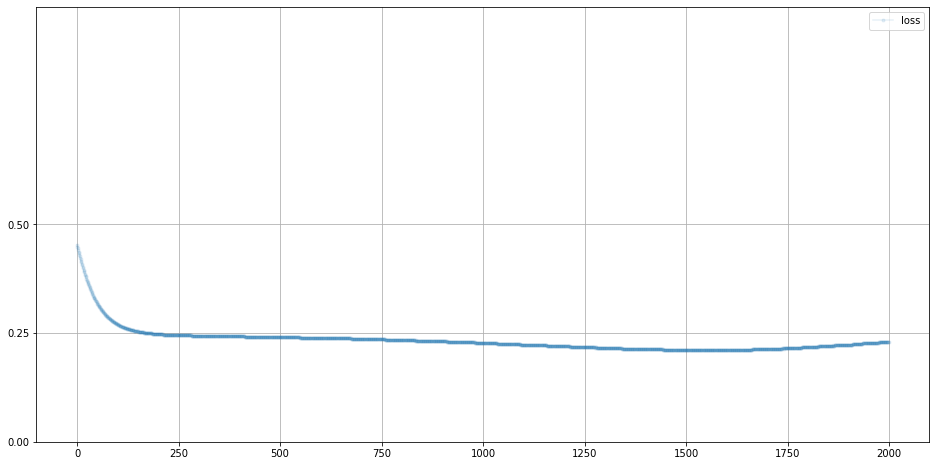

In [ ]:
D.plot_progress()

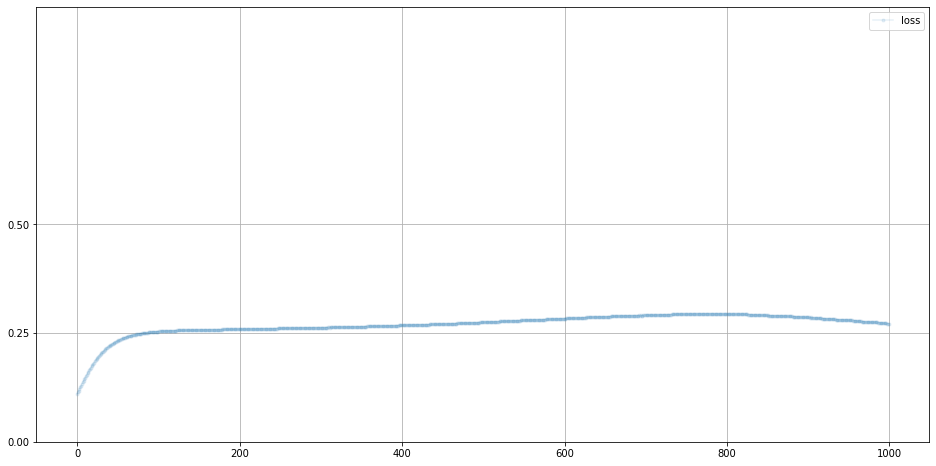

In [ ]:
G.plot_progress()

In [ ]:
G.forward(torch.FloatTensor([0.5]))

tensor([0.8709, 0.1285, 0.7750, 0.2189], grad_fn=<SigmoidBackward>)

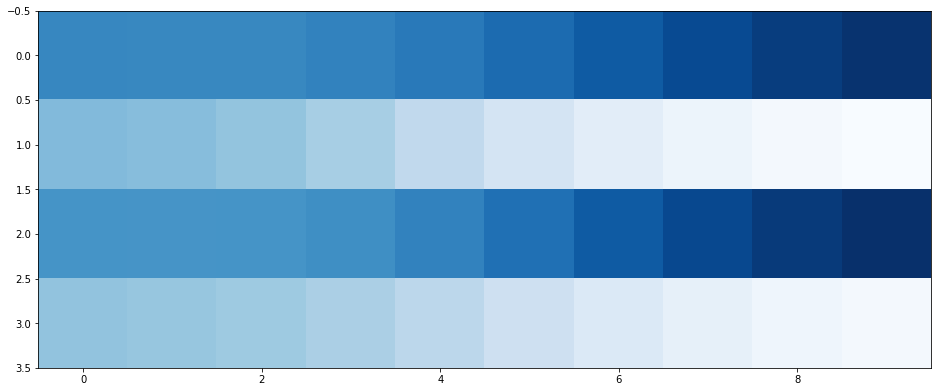

In [ ]:
plt.figure(figsize=(16,8))
plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')